In [132]:
# Run reviews_exploratiion.ipynb first.
import pandas as pd
import json
import ast
import numpy as np
import math
import missingno as msno
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [133]:
# Import data.
games_returns_release_df = pd.read_csv('games_returns_release_date.csv')
games_returns_release_df.head()

,Unnamed: 0,Unnamed: 0_x,igdb_id,first_release_date,name,slug,mature,single_player,multiplayer,igdb_name,...,smb,hml,rmw,cma,rf,benchmark_price,returns,benchmark_returns,excess_return,market_cap
0,0,2,117,2016-12-06,The Last Guardian,the-last-guardian,False,True,False,The Last Guardian,...,-0.09,1.07,-0.27,0.14,0.00,1394.21,-0.007726,0.001761,-0.009487,4.029600e+12
1,1,2,117,2016-12-06,The Last Guardian,the-last-guardian,False,True,False,The Last Guardian,...,-0.09,1.07,-0.27,0.14,0.00,1394.21,-0.007724,0.001761,-0.009486,3.292524e+10
2,3,2506,119386,2020-11-30,Empire of Sin,empire-of-sin,True,True,False,Empire of Sin,...,0.47,-1.31,0.02,-0.63,0.00,575.44,0.034510,-0.002600,0.037110,2.785728e+10
3,4,2506,119386,2020-11-30,Empire of Sin,empire-of-sin,True,True,False,Empire of Sin,...,0.47,-1.31,0.02,-0.63,0.00,575.44,0.084647,-0.002600,0.087247,2.760384e+09
4,10,2514,120175,2020-02-27,One Punch Man: A Hero Nobody Knows,one-punch-man-a-hero-nobody-knows,False,True,False,One Punch Man: A Hero Nobody Knows,...,-0.86,0.56,-0.49,0.33,0.01,1480.58,-0.005932,-0.004549,-0.001383,1.254300e+12


In [134]:
# Check columns for columns that can be dropped.
games_returns_release_df.columns

Index(['Unnamed: 0', 'Unnamed: 0_x', 'igdb_id', 'first_release_date', 'name',
       'slug', 'mature', 'single_player', 'multiplayer', 'igdb_name',
       'opencritic_name', 'opencritic_id', 'dist', 'hasLootBoxes',
       'percentRecommended', 'numReviews', 'numTopCriticReviews',
       'medianScore', 'topCriticScore', 'percentile', 'firstReleaseDate',
       'firstReviewDate', 'latestReviewDate', 'variable', 'igdb_company_id',
       'developer', 'publisher', 'stock_id', 'date', 'Unnamed: 0_y', 'gvkey',
       'iid', 'company_name', 'shares_outstanding', 'trading_volume',
       'closing_price', 'total_return_factor', 'eu', 'jp', 'us', 'mkt-rf',
       'smb', 'hml', 'rmw', 'cma', 'rf', 'benchmark_price', 'returns',
       'benchmark_returns', 'excess_return', 'market_cap'],
      dtype='object')

In [135]:
# Drop unused columns.
games_returns_release_df = games_returns_release_df.drop([
    'Unnamed: 0',
    'Unnamed: 0_x',
    'slug',
    'Unnamed: 0_y',
    'gvkey',
    'shares_outstanding',
    'total_return_factor',
    'variable',
    'igdb_name',
    'opencritic_id',
    'first_release_date',
    'benchmark_returns'
    ], axis=1)

games_returns_release_df.head()

,igdb_id,name,mature,single_player,multiplayer,opencritic_name,dist,hasLootBoxes,percentRecommended,numReviews,...,mkt-rf,smb,hml,rmw,cma,rf,benchmark_price,returns,excess_return,market_cap
0,117,The Last Guardian,False,True,False,The Last Guardian,0.0,False,70.491803,128.0,...,0.49,-0.09,1.07,-0.27,0.14,0.00,1394.21,-0.007726,-0.009487,4.029600e+12
1,117,The Last Guardian,False,True,False,The Last Guardian,0.0,False,70.491803,128.0,...,0.49,-0.09,1.07,-0.27,0.14,0.00,1394.21,-0.007724,-0.009486,3.292524e+10
2,119386,Empire of Sin,True,True,False,Empire of Sin,0.0,False,27.118644,60.0,...,-1.10,0.47,-1.31,0.02,-0.63,0.00,575.44,0.034510,0.037110,2.785728e+10
3,119386,Empire of Sin,True,True,False,Empire of Sin,0.0,False,27.118644,60.0,...,-1.10,0.47,-1.31,0.02,-0.63,0.00,575.44,0.084647,0.087247,2.760384e+09
4,120175,One Punch Man: A Hero Nobody Knows,False,True,False,One-Punch Man: A Hero Nobody Knows,0.0,False,17.105263,76.0,...,-1.63,-0.86,0.56,-0.49,0.33,0.01,1480.58,-0.005932,-0.001383,1.254300e+12


In [136]:
games_returns_release_df[['mature',
                          'single_player', 
                          'multiplayer', 
                          'hasLootBoxes', 
                          'developer',
                          'publisher',
                          'eu',
                          'jp',
                          'us']] = games_returns_release_df[['mature',
                          'single_player', 
                          'multiplayer', 
                          'hasLootBoxes', 
                          'developer',
                          'publisher',
                          'eu',
                          'jp',
                          'us']].astype(int)

<Axes: >

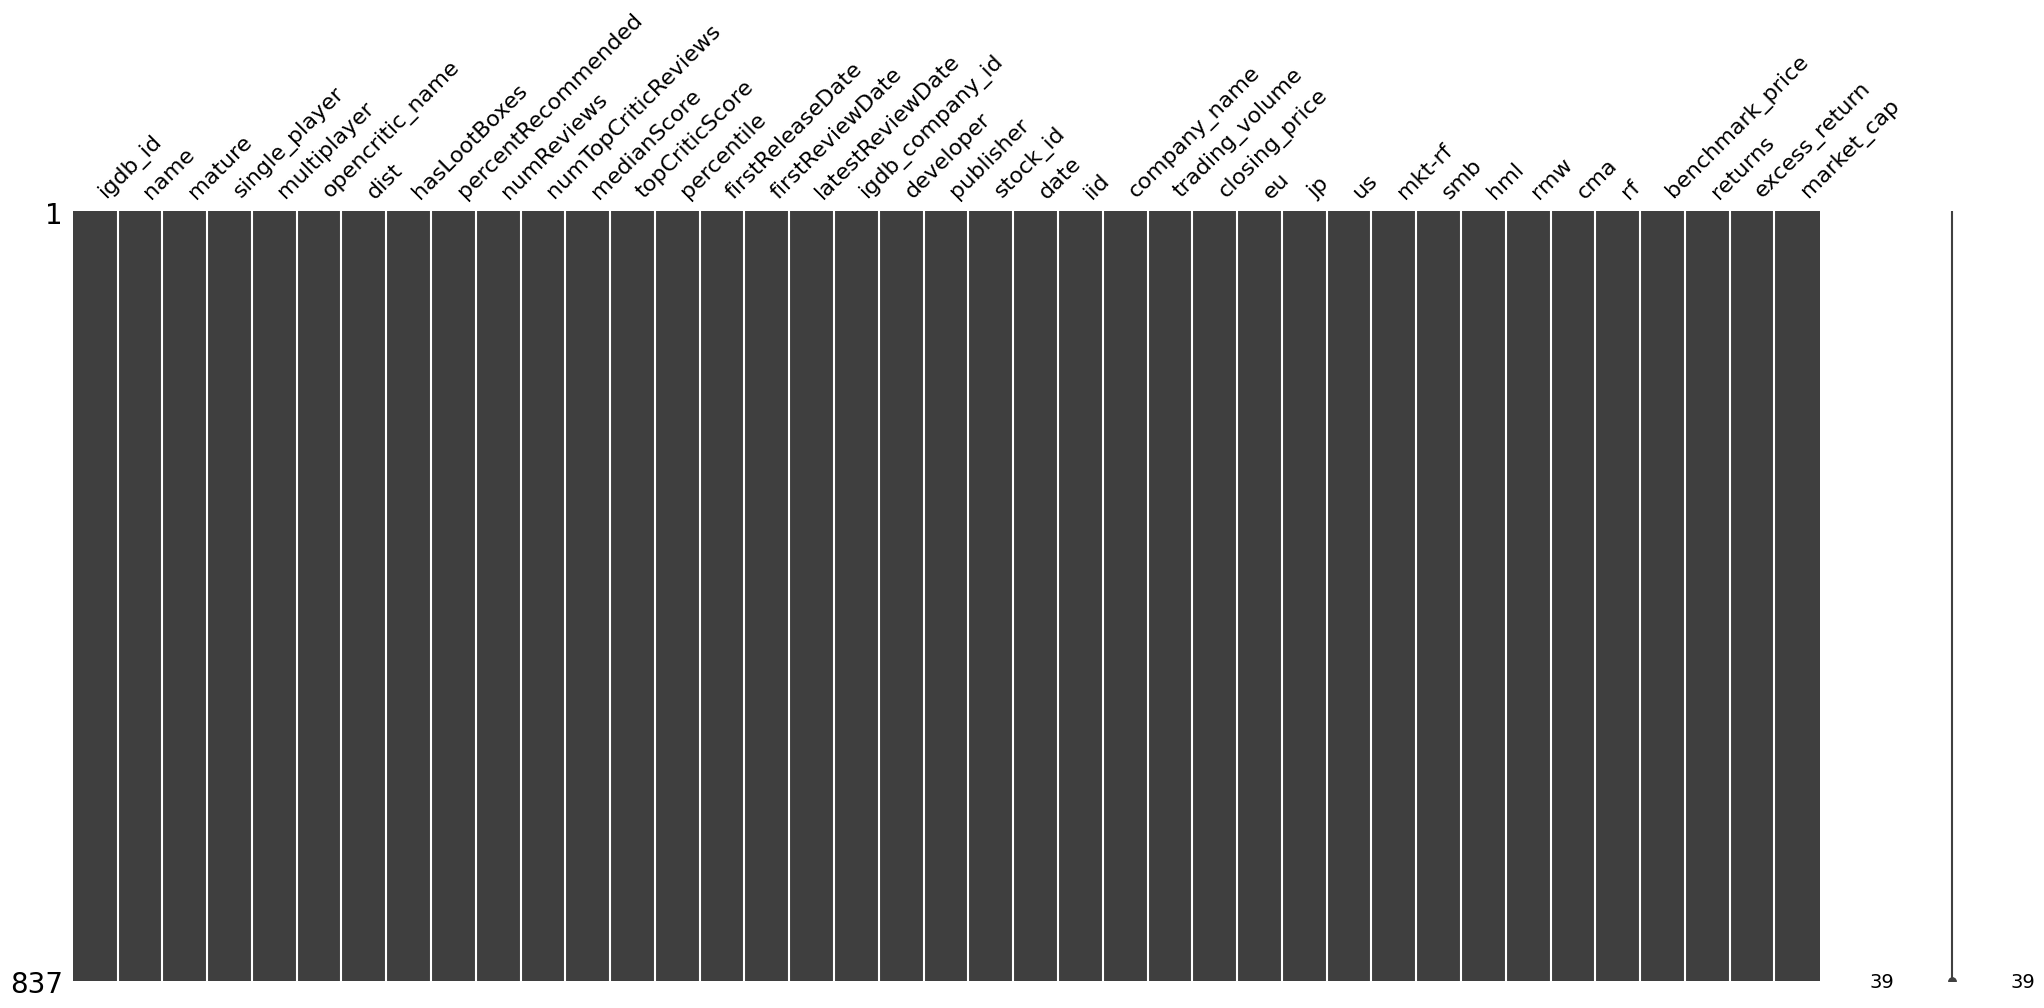

In [137]:
# Plot missing data.
%matplotlib inline

msno.matrix(games_returns_release_df)

In [138]:
def run_ols_model(df, dependent_var, independent_vars):
    X = df[independent_vars]
    Y = df[dependent_var]
    
    X = sm.add_constant(X)
    
    model = sm.OLS(Y, X).fit()
    predictions = model.predict(X)
    
    return model.summary()

In [139]:
games_returns_release_df.columns

Index(['igdb_id', 'name', 'mature', 'single_player', 'multiplayer',
       'opencritic_name', 'dist', 'hasLootBoxes', 'percentRecommended',
       'numReviews', 'numTopCriticReviews', 'medianScore', 'topCriticScore',
       'percentile', 'firstReleaseDate', 'firstReviewDate', 'latestReviewDate',
       'igdb_company_id', 'developer', 'publisher', 'stock_id', 'date', 'iid',
       'company_name', 'trading_volume', 'closing_price', 'eu', 'jp', 'us',
       'mkt-rf', 'smb', 'hml', 'rmw', 'cma', 'rf', 'benchmark_price',
       'returns', 'excess_return', 'market_cap'],
      dtype='object')

In [140]:
x_df = games_returns_release_df[['mature',
                                'single_player', 
                                'multiplayer', 
                                'hasLootBoxes', 
                                'medianScore',
                                'developer',
                                'publisher',
                                'eu',
                                'jp',
                                'us',
                                'mkt-rf',
                                'smb',
                                'hml',
                                'rmw',
                                'cma',
                                'rf',
                                'market_cap']]
x_df.dtypes

mature             int64
single_player      int64
multiplayer        int64
hasLootBoxes       int64
medianScore      float64
developer          int64
publisher          int64
eu                 int64
jp                 int64
us                 int64
mkt-rf           float64
smb              float64
hml              float64
rmw              float64
cma              float64
rf               float64
market_cap       float64
dtype: object

In [141]:
results_hic = run_ols_model(games_returns_release_df, 'excess_return', ['mature',
                                                   'single_player', 
                                                   'multiplayer', 
                                                   #'hasLootBoxes', 
                                                   'medianScore',
                                                   'developer',
                                                   'publisher',
                                                   'eu',
                                                   'jp',
                                                   'us',
                                                   'mkt-rf',
                                                   'smb',
                                                   'hml',
                                                   'rmw',
                                                   'cma',
                                                   'rf',
                                                   'market_cap'])
print(results_hic)

                            OLS Regression Results                            
Dep. Variable:          excess_return   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     2.271
Date:                Wed, 31 May 2023   Prob (F-statistic):            0.00615
Time:                        01:52:49   Log-Likelihood:                 457.17
No. Observations:                 837   AIC:                            -886.3
Df Residuals:                     823   BIC:                            -820.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0411      0.058     -0.712

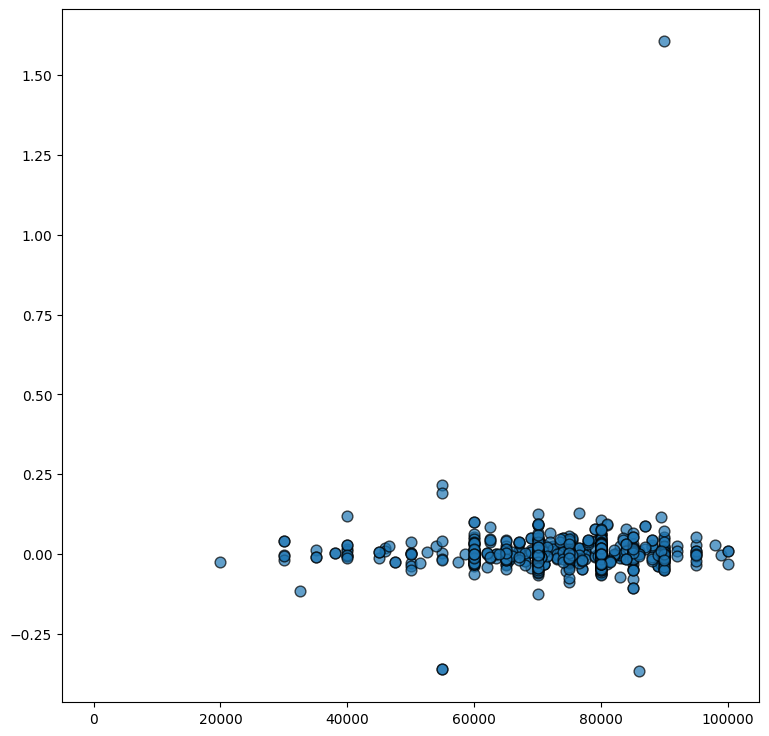

In [148]:
# Generate data
x = games_returns_release_df['medianScore']
y = np.log(games_returns_release_df['excess_return'] + 1)

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(0, 10, num=100)

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5);

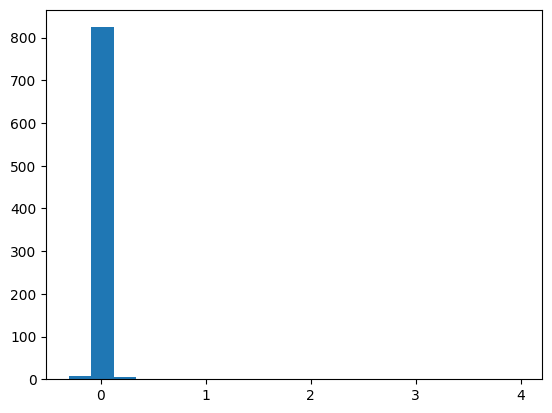

In [143]:
plt.hist(games_returns_release_df['excess_return'], bins = 20)
plt.show() 

<Axes: xlabel='excess_return', ylabel='Count'>

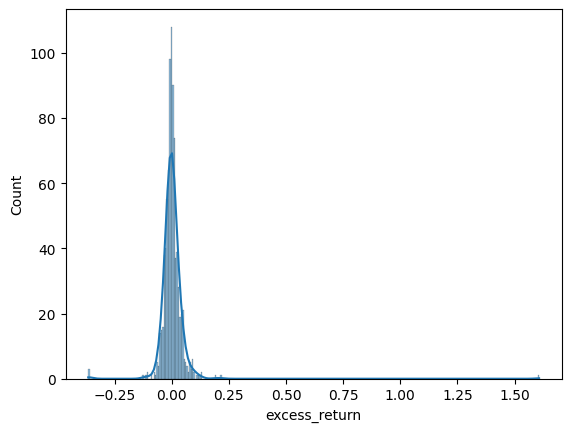

In [153]:
# Density Plot
sns.histplot(np.log(games_returns_release_df['excess_return'] + 1), kde=True)

<Axes: xlabel='returns', ylabel='Count'>

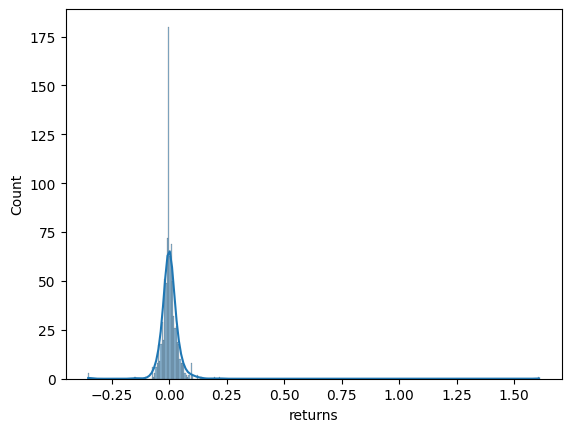

In [152]:
# Density Plot
sns.histplot(np.log(games_returns_release_df['returns'] + 1), kde=True)
# sns.displo(np.log(games_returns_release_df['returns'] + 1), hist=True, kde=True, 
#              bins=int(180/5), color = 'darkblue', 
#              hist_kws={'edgecolor':'black'},
#              kde_kws={'linewidth': 4})